In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# df.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


In [17]:
table = pd.pivot_table(data=df,index=['Sex'])
table
# df['Pclass'].mean()

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,30.272362,49.747699,0.598684,2.144737,0.565789,1
male,30.272732,27.527877,0.274436,2.334586,0.379699,0


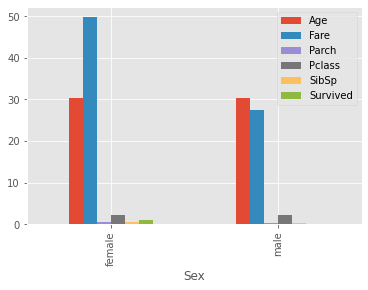

In [18]:
table.plot(kind='bar');

In [19]:
table = pd.pivot_table(df,index=['Sex','Pclass'])
table

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       41.333333  115.591168  0.500000  0.560000         1
       2       24.376552   26.438750  0.766667  0.533333         1
       3       23.073400   13.735129  0.597222  0.583333         1
male   1       40.520000   75.586551  0.280702  0.403509         0
       2       30.940678   20.184654  0.142857  0.301587         0
       3       24.525104   11.826350  0.328767  0.404110         0

In [20]:
table = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       41.333333        50
       2       24.376552        30
       3       23.073400        72
male   1       40.520000         0
       2       30.940678         0
       3       24.525104         0

In [21]:
table = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean)
table

Survived
Sex    Pclass          
female 1              1
       2              1
       3              1
male   1              0
       2              0
       3              0

<AxesSubplot:xlabel='Sex,Pclass'>

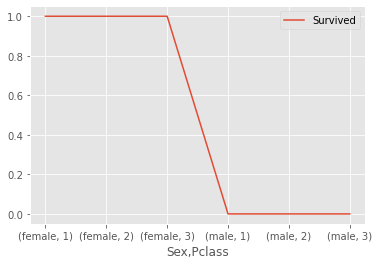

In [26]:
table.plot(kind='line')

In [27]:
table = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table

Survived        
Pclass        1   2   3
Sex                    
female       50  30  72
male          0   0   0

In [29]:
stacked = table.stack()
stacked

Survived
Sex    Pclass          
female 1             50
       2             30
       3             72
male   1              0
       2              0
       3              0

In [ ]:
stacked

In [30]:
stacked.unstack('Pclass')

Survived        
Pclass        1   2   3
Sex                    
female       50  30  72
male          0   0   0

In [31]:
index = pd.MultiIndex.from_product([[2, 1], ["a", "b"]])
index


MultiIndex([(2, 'a'),
            (2, 'b'),
            (1, 'a'),
            (1, 'b')],
           )

In [36]:
df = pd.DataFrame(np.random.randn(4), index=index, columns=["A"])

df

A
2 a -0.163480
  b  0.486489
1 a -0.364201
  b  0.000664

In [38]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat", "long"),
        ("B", "cat", "long"),
        ("A", "dog", "short"),
        ("B", "dog", "short"),
    ],
    names=["exp", "animal", "hair_length"],
)
columns

MultiIndex([('A', 'cat',  'long'),
            ('B', 'cat',  'long'),
            ('A', 'dog', 'short'),
            ('B', 'dog', 'short')],
           names=['exp', 'animal', 'hair_length'])

In [40]:
index = pd.MultiIndex.from_product(
    [("bar", "baz", "foo", "qux"), ("one", "two")], names=["first", "second"]
)
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [44]:
df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)

df2 = df.iloc[[0, 1, 2, 4, 5, 7]]

df2

exp                  A         B         A         B
animal             cat       cat       dog       dog
hair_length       long      long     short     short
first second                                        
bar   one    -0.422157 -0.232075  0.448682  1.381248
      two    -1.686649 -0.100539 -0.303814  1.739642
baz   one     1.469174 -0.572211 -0.541974  0.579066
foo   one     0.041000  1.140215 -0.602491  2.170598
      two     1.957332 -0.688922  0.938633 -0.472791
qux   two     0.097549 -0.805395  0.221776 -1.306786

In [45]:
df2.stack("exp")

animal                 cat       dog
hair_length           long     short
first second exp                    
bar   one    A   -0.422157  0.448682
             B   -0.232075  1.381248
      two    A   -1.686649 -0.303814
             B   -0.100539  1.739642
baz   one    A    1.469174 -0.541974
             B   -0.572211  0.579066
foo   one    A    0.041000 -0.602491
             B    1.140215  2.170598
      two    A    1.957332  0.938633
             B   -0.688922 -0.472791
qux   two    A    0.097549  0.221776
             B   -0.805395 -1.306786

In [46]:
df2.stack("animal")

exp                         A                   B          
hair_length              long     short      long     short
first second animal                                        
bar   one    cat    -0.422157       NaN -0.232075       NaN
             dog          NaN  0.448682       NaN  1.381248
      two    cat    -1.686649       NaN -0.100539       NaN
             dog          NaN -0.303814       NaN  1.739642
baz   one    cat     1.469174       NaN -0.572211       NaN
             dog          NaN -0.541974       NaN  0.579066
foo   one    cat     0.041000       NaN  1.140215       NaN
             dog          NaN -0.602491       NaN  2.170598
      two    cat     1.957332       NaN -0.688922       NaN
             dog          NaN  0.938633       NaN -0.472791
qux   two    cat     0.097549       NaN -0.805395       NaN
             dog          NaN  0.221776       NaN -1.306786

In [50]:
df.stack(level=["exp", "hair_length"])

animal                             cat       dog
first second exp hair_length                    
bar   one    A   long        -0.422157       NaN
                 short             NaN  0.448682
             B   long        -0.232075       NaN
                 short             NaN  1.381248
      two    A   long        -1.686649       NaN
                 short             NaN -0.303814
             B   long        -0.100539       NaN
                 short             NaN  1.739642
baz   one    A   long         1.469174       NaN
                 short             NaN -0.541974
             B   long        -0.572211       NaN
                 short             NaN  0.579066
      two    A   long         0.531253       NaN
                 short             NaN -0.019557
             B   long        -0.343532       NaN
                 short             NaN -0.179538
foo   one    A   long         0.041000       NaN
                 short             NaN -0.602491
             B   long         1.140215       NaN
                 short             NaN  2.170598
      two    A   long         1.957332       NaN
                 short             NaN  0.938633
             B   long        -0.688922       NaN
                 short             NaN -0.472791
qux   one    A   long        -0.946475       NaN
                 short             NaN -0.900265
             B   long         0.093614       NaN
                 short             NaN -0.108787
      two    A   long         0.097549       NaN
                 short             NaN  0.221776
             B   long        -0.805395       NaN
                 short             NaN -1.306786

In [48]:
df.stack(level=[1, 2])

exp                                     A         B
first second animal hair_length                    
bar   one    cat    long        -0.422157 -0.232075
             dog    short        0.448682  1.381248
      two    cat    long        -1.686649 -0.100539
             dog    short       -0.303814  1.739642
baz   one    cat    long         1.469174 -0.572211
             dog    short       -0.541974  0.579066
      two    cat    long         0.531253 -0.343532
             dog    short       -0.019557 -0.179538
foo   one    cat    long         0.041000  1.140215
             dog    short       -0.602491  2.170598
      two    cat    long         1.957332 -0.688922
             dog    short        0.938633 -0.472791
qux   one    cat    long        -0.946475  0.093614
             dog    short       -0.900265 -0.108787
      two    cat    long         0.097549 -0.805395
             dog    short        0.221776 -1.306786